Berk Uzalp 23956

In [1]:
import pandas as pd
import reverse_geocoder as rg
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [2]:
from os.path import join

In [3]:

filename = "taxi-trips.csv"

df = pd.read_csv(filename)
count_row = df.shape[0] 


In [38]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup district,dropoff district,distance,time of day,days
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush hour evening,0
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening,3
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush hour morning,4
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon,0
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon,0


In [6]:
n_rows, n_columns = df.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))


number of rows: 118185, number of columns: 11


In [7]:
print(df.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


| Attribute |  Explanation  |
|----------------------------|-----------------------------------------------------------------|
|id                          |  a unique identifier for each trip                              |
|vendor id                   |  a code indicating the provider associated with the trip record |
|pickup datetime             |  date and time when the meter was engaged                       |
|dropoff datetime            |  date and time when the meter was disengaged                    |
|passenger count             |  the number of passengers in the vehicle                        |
|pickup longitude            |  the longitude where the meter was engaged                      |
|pickup latitude             |  the latitude where the meter was engaged                       |
|dropoff longitude           |  the longitude where the meter was disengaged                   |
|dropoff store and fwd flag  |  indicates whether the trip record was held in vehicle memory   |
|trip duration               |  duration of the trip in seconds                                |

In [5]:
df['pickup district'] =np.nan
df['dropoff district'] =np.nan

In [6]:
long2=df['dropoff_longitude']
lat2=df['dropoff_latitude']
long1=df['pickup_longitude']
lat1=df['pickup_latitude']

clist1=[]
clist2=[]
ctemp1=[]
ctemp2=[]
for i in range(118185):
    coordinates=(lat1[i] , long1[i])
    clist1.append(coordinates)
    coordinates2=(lat2[i] , long2[i])
    clist2.append(coordinates2)
y1=rg.search(clist1)
y2=rg.search(clist2)

for i in range(118185):
    ctemp1.append(y1[i]['name'])
    ctemp2.append(y2[i]['name'])
df['pickup district']=ctemp1
df['dropoff district']=ctemp2

Loading formatted geocoded file...


In [7]:
print("top 5 places to pick up customers:")
top5locations=df['pickup district'].value_counts()
print(top5locations.head(5))

top 5 places to pick up customers:
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup district, dtype: int64


In [8]:
print("top 5 places where customers drop off:")
top5locations2=df['dropoff district'].value_counts()
print(top5locations2.head(5))

top 5 places where customers drop off:
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff district, dtype: int64


In [9]:
from geopy.distance import geodesic

dlist=[]

for i in range(count_row):
    dist=(lat1[i],long1[i])
    dist1=(lat2[i],long2[i])
    dlist.append(geodesic(dist,dist1).miles)
df['distance']=dlist

In [10]:
df['time of day']=np.nan
dtimelist=[]
tempdate=[]
tempdate=df['pickup_datetime']

for i in range(count_row):
    x=str(tempdate[i])
    xi=int(x[11:13])
    if xi>=7 and xi<9:
        dtimelist.append("rush hour morning")
    elif xi>=9 and xi<16:
         dtimelist.append("afternoon")
    elif xi>=16 and xi<18:
        dtimelist.append("rush hour evening")
    elif xi>=18 and xi<23:
        dtimelist.append("evening")
    elif xi>=23:
        dtimelist.append("late night")
    elif xi<7:
        dtimelist.append("late night")
df['time of day']=dtimelist



In [14]:
print(df['time of day'].value_counts())

afternoon            39752
evening              35194
late night           21528
rush hour evening    11564
rush hour morning    10147
Name: time of day, dtype: int64


Text(0.5, 1.0, 'Distance taken when time of the day changes')

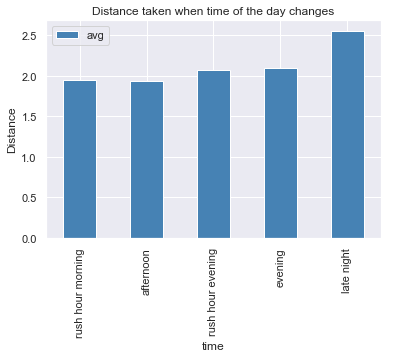

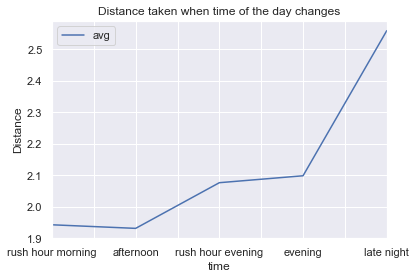

In [11]:
tempsum=0
tempsum1=0
tempsum2=0
tempsum3=0
tempsum4=0
for i in range(count_row):
    if df['time of day'][i]=="rush hour morning":
        tempsum=tempsum+df['distance'][i]
    elif df['time of day'][i]=="afternoon":
        tempsum1=tempsum1+df['distance'][i]
    elif df['time of day'][i]=="rush hour evening":
        tempsum2=tempsum2+df['distance'][i]
    elif df['time of day'][i]=="evening":
        tempsum3=tempsum3+df['distance'][i]
    elif df['time of day'][i]=="late night":
        tempsum4=tempsum4+df['distance'][i]
avg1=tempsum/10147
avg2=tempsum1/39752
avg3=tempsum2/11564
avg4=tempsum3/35194
avg5=tempsum4/21528
avgtimes=pd.DataFrame({'time':["rush hour morning","afternoon","rush hour evening","evening","late night"],'avg':[avg1,avg2,avg3,avg4,avg5]})
ax = avgtimes.plot(kind="bar",
                   color="steelblue",
                   rot=90,y='avg',x='time')
plt.ylabel("Distance")
plt.title('Distance taken when time of the day changes')
 
lines = avgtimes.plot.line(y='avg',x='time')
plt.ylabel("Distance")
plt.title('Distance taken when time of the day changes')
 
    

average distance goes down till "afternoon" then increases till evening and reach it's max at late night.

Text(0.5, 1.0, 'trip duration when time of the day changes')

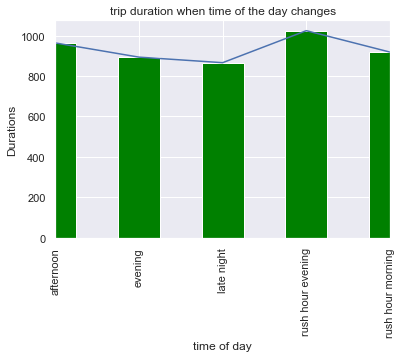

In [12]:
timeofdays = df.groupby(by="time of day").sum()["trip_duration"]
numberofrides = df.groupby(by="time of day").count()["id"]        
avgtimes=timeofdays/numberofrides
ax = avgtimes.plot(kind="bar", color="green",rot=90)
lines = avgtimes.plot.line(y='avg',x='duration',rot=90)
plt.ylabel("Durations")
plt.title('trip duration when time of the day changes')


1. Does passenger group size affect the distance?
• Null hypothesis: passenger group size has no effect on the distance.
To test this we can use pearson correlation to find how dependent group size and distance is

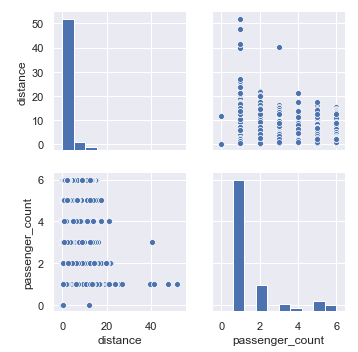

In [27]:
cols = ["distance", "passenger_count"]

sns.pairplot(data=df, vars=cols)

In [29]:
stats.pearsonr(df["distance"], df["passenger_count"])

(0.005969284310210781, 0.04015801711548572)

As seen in the results the correlation coefficient we obtained is too small there for we can say their correlation is not significant which says that Null hypothesis is true, distance and passenger count does not effect each other.

2. Do trip distances increase in weekends?
• Null hypothesis: The day of the week has no effect on the distance

In [13]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

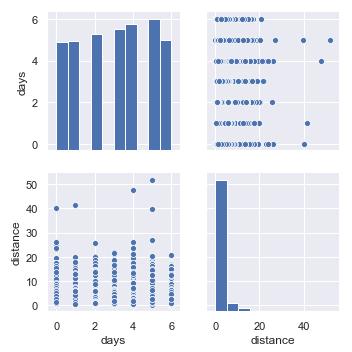

In [35]:

dftest=df
dftest['days']=df["pickup_datetime"].dt.dayofweek
cols ="days" , "distance"


sns.pairplot(data=dftest,vars=cols)



In [40]:
stats.pearsonr( dftest["distance"],dftest["days"])

(0.014648608934216068, 4.75057008565448e-07)

as value 4.7 indicates there is parts that day and distance has strong relations therefor can reject this null hypothesis. for main hypothesis: weekends does not increase distances as seen in left bottom graph "saturday" distance is in range of 0-20 while weekdays can reach above 50.